In [40]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import os 
import sys 
import pickle
root_path = os.path.realpath('../')
sys.path.append(root_path)

from utils.parser import parse_alldata
from utils.analysis import print_testacc, print_ttest_acc, compute_choicemats, fit_sigmoids_to_choices, gen_choicemodelrdms, stats_fit_choicerdms,fit_model_to_subjects, arena_compute_rdms
from utils.plotting import disp_accuracy, disp_lcurves, disp_sigmoid_fits, disp_param_estimates, disp_choicemats, disp_rsa_param_estimates, disp_model_estimates, disp_lcurves_test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [41]:
# set a few parameters 
%matplotlib inline
working_dir = os.getcwd()
data_dir = working_dir + "/../data/animals_vehicles_3_transfer_partialfb/"

domains = ['animals','vehicles']
curricula = ['blocked','interleaved']



# Data Import

In [42]:
# parse data 
try:
    with open(data_dir+"parsed/"+"animals_vehicles_transfer_pfb.pkl","rb") as f:
        alldata = pickle.load(f)
except FileNotFoundError:
    alldata = parse_alldata(data_dir+"raw/",transfertask=True, arenatask=True)
    from utils.parser import boundary_to_nan
    alldata = boundary_to_nan(alldata)
    with open(data_dir+"parsed/"+"animals_vehicles_transfer_pfb.pkl","wb") as f:
        pickle.dump(alldata,f)
    


# Analysis

## Accuracy

### accuracy differences between groups at test

In [43]:

print_testacc(alldata,onlygood=True, whichtask="base")
print_ttest_acc(alldata, onlygood=True, whichtask="base")
print('\n')
print_testacc(alldata,onlygood=True, whichtask="transfer")
print_ttest_acc(alldata, onlygood=True, whichtask="transfer")

** Accuracy on base task **
only good subjects (n=47): animals, blocked: 0.71
only good subjects (n=50): animals, interleaved: 0.67
only good subjects (n=49): vehicles, blocked: 0.73
only good subjects (n=47): vehicles, interleaved: 0.69
** mann whitney u on base task **
only good subjects: animals, blocked vs interleaved: p= 0.120
only good subjects: vehicles, blocked vs interleaved: p= 0.283


** Accuracy on transfer task **
only good subjects (n=47): animals, blocked: 0.55
only good subjects (n=50): animals, interleaved: 0.51
only good subjects (n=49): vehicles, blocked: 0.58
only good subjects (n=47): vehicles, interleaved: 0.58
** mann whitney u on transfer task **
only good subjects: animals, blocked vs interleaved: p= 0.176
only good subjects: vehicles, blocked vs interleaved: p= 0.776


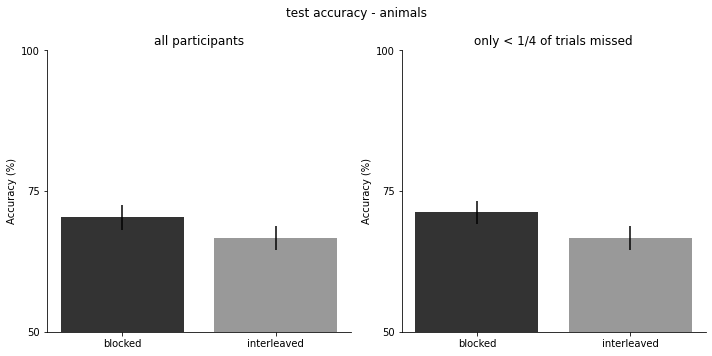

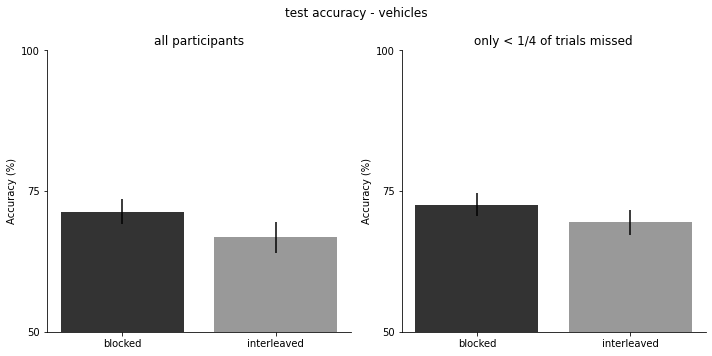

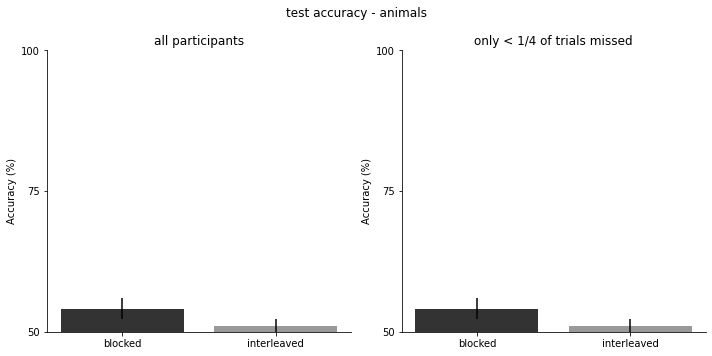

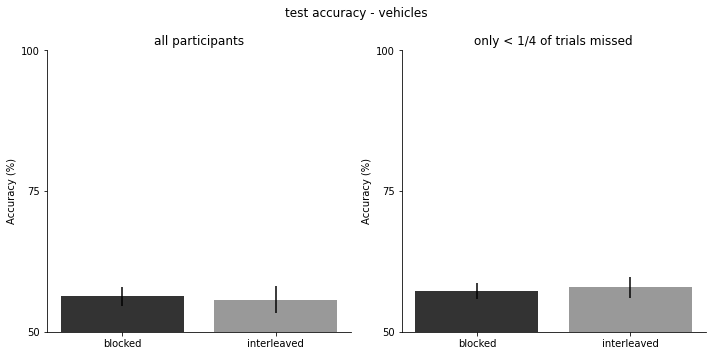

In [44]:
# plot test accuracy
disp_accuracy(alldata,'animals',whichtask="base")
disp_accuracy(alldata,'vehicles',whichtask="base")
        
disp_accuracy(alldata,'animals',whichtask="transfer")
disp_accuracy(alldata,'vehicles',whichtask="transfer")


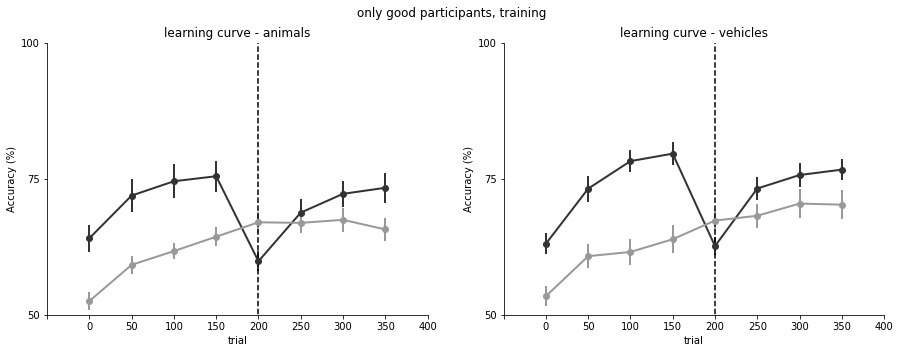

In [45]:
# learning curves
disp_lcurves(alldata,onlygood=True)

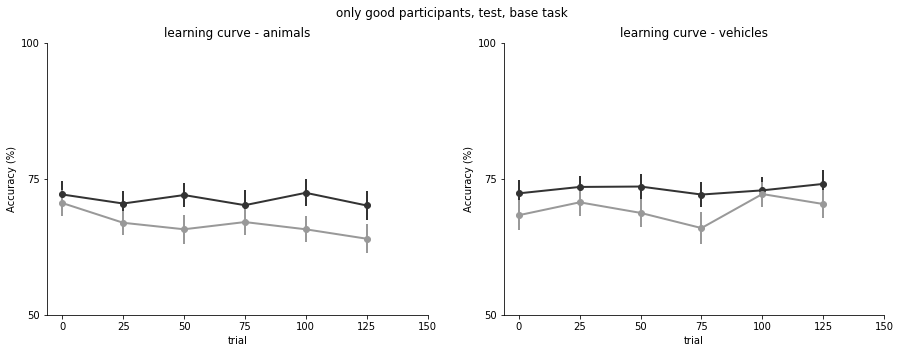

In [46]:
disp_lcurves_test(alldata,onlygood=True, whichtask="base")

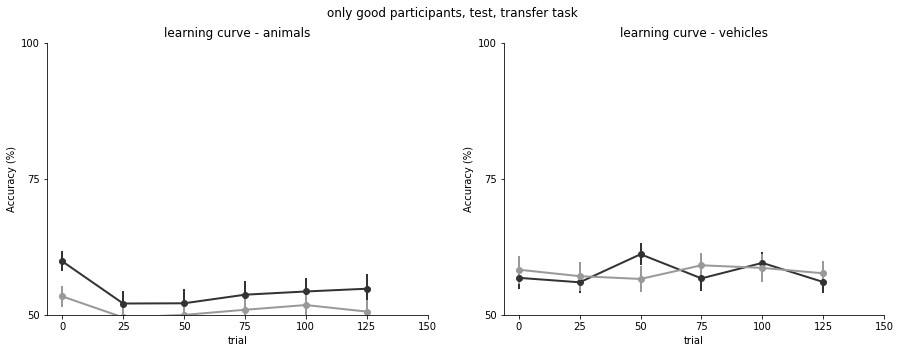

In [47]:
disp_lcurves_test(alldata,onlygood=True, whichtask="transfer")

## Choice Patterns

In [48]:
choicemats = compute_choicemats(alldata, whichtask="base")

### display sigmoids for rel and irrel dimensions 

In [ ]:
choicemats = compute_choicemats(alldata, whichtask="base")
betas = fit_sigmoids_to_choices(choicemats,onlygood=True, fitlapse=False)
disp_sigmoid_fits(choicemats,betas, onlygood=True)
# stats on estimated slopes
disp_param_estimates(betas,onlygood=True)

In [ ]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
betas = fit_sigmoids_to_choices(choicemats,onlygood=True, fitlapse=False)
disp_sigmoid_fits(choicemats,betas, onlygood=True)
# stats on estimated slopes
disp_param_estimates(betas,onlygood=True)

### display full choice matrices

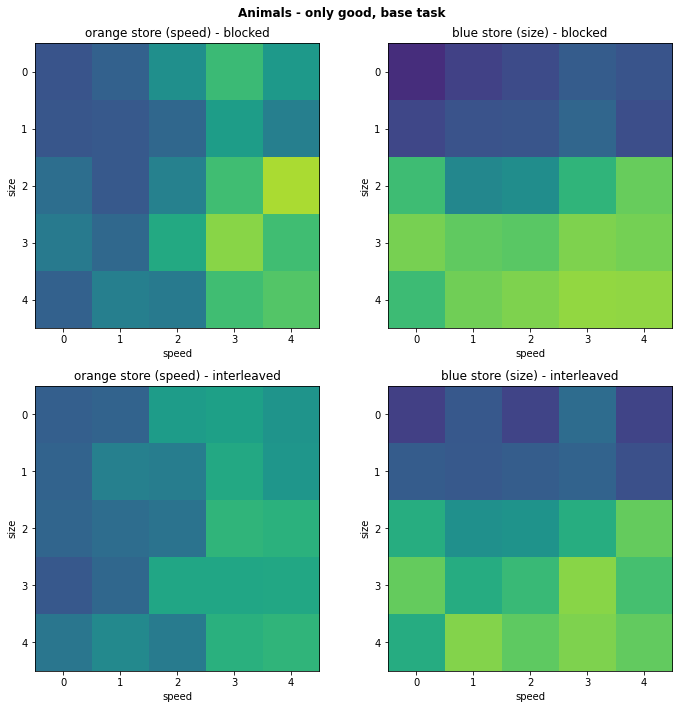

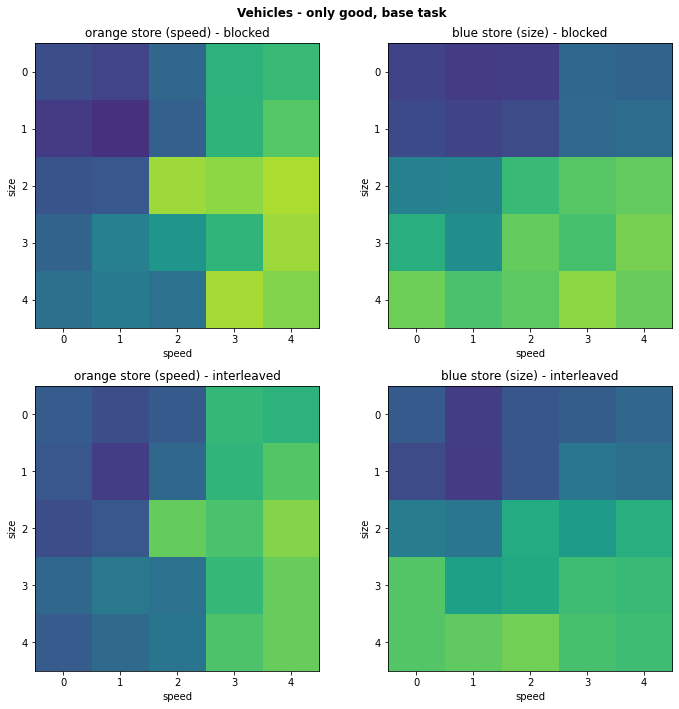

In [49]:
choicemats = compute_choicemats(alldata, whichtask="base")
disp_choicemats(choicemats,onlygood=True,whichtask="base")

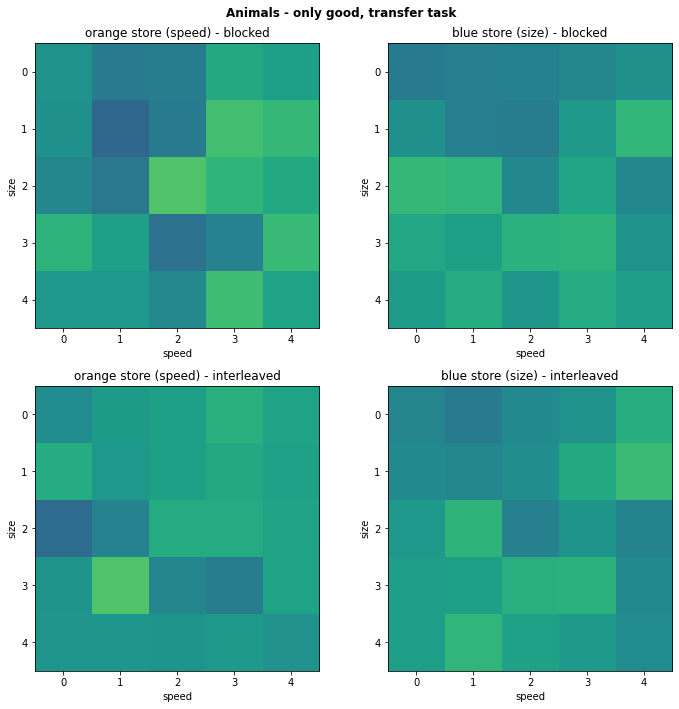

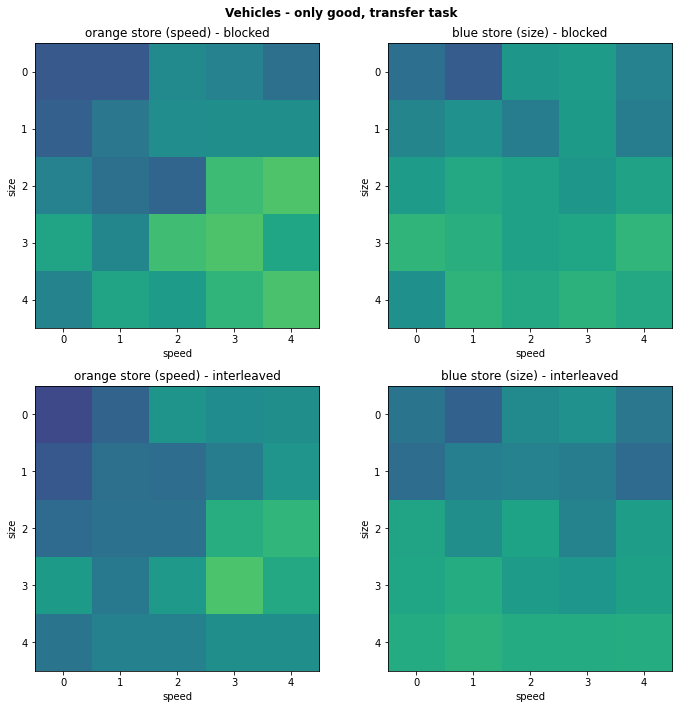

In [50]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
disp_choicemats(choicemats,onlygood=True,whichtask="transfer")

## Choice Pattern RSA


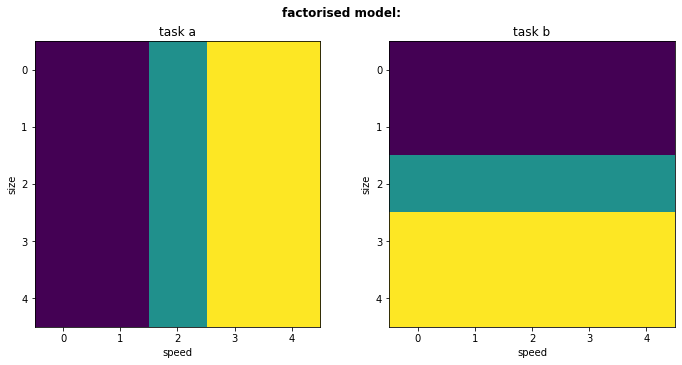

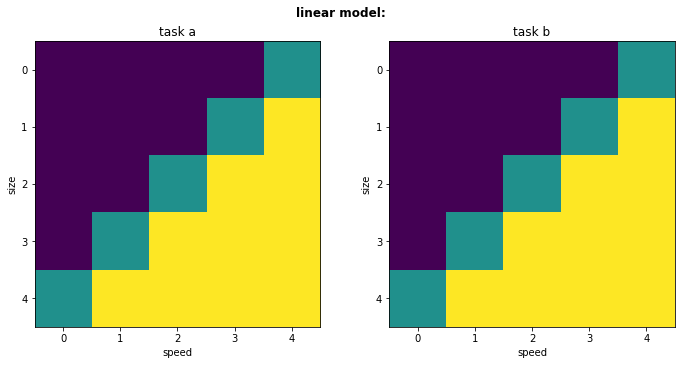

In [51]:
_ = gen_choicemodelrdms(monitor=True)

animals blocked 6
vehicles interleaved 45


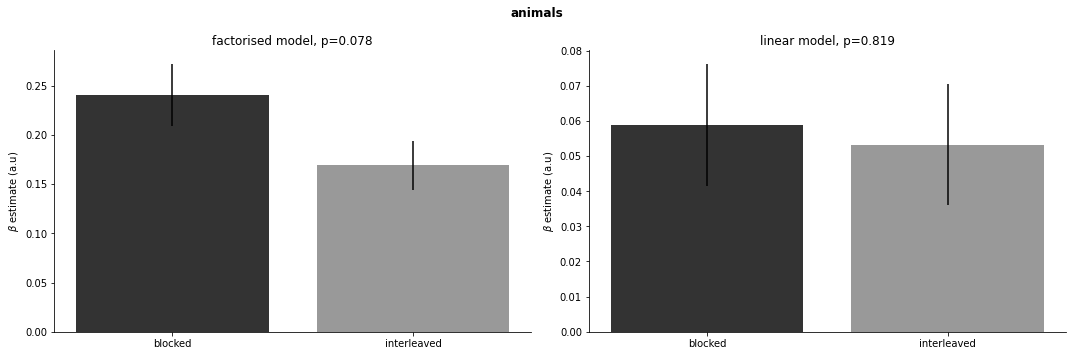

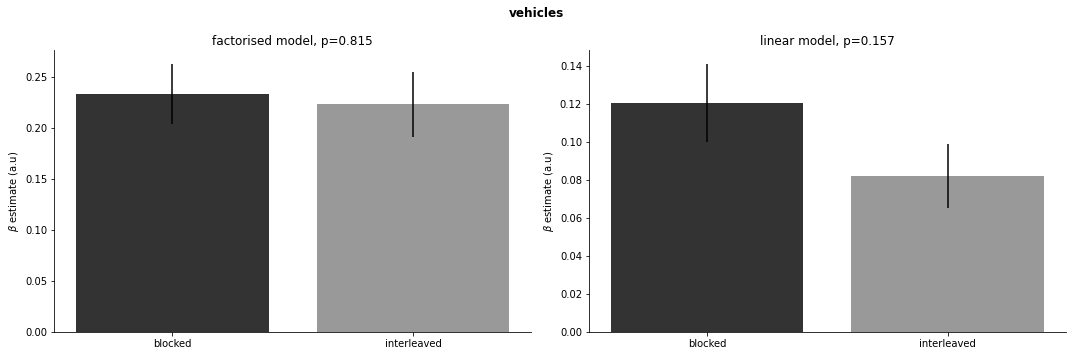

In [52]:
choicemats = compute_choicemats(alldata, whichtask="base")
betas = stats_fit_choicerdms(choicemats,onlygood=True)
disp_rsa_param_estimates(betas,onlygood=True)

animals interleaved 16
animals interleaved 41


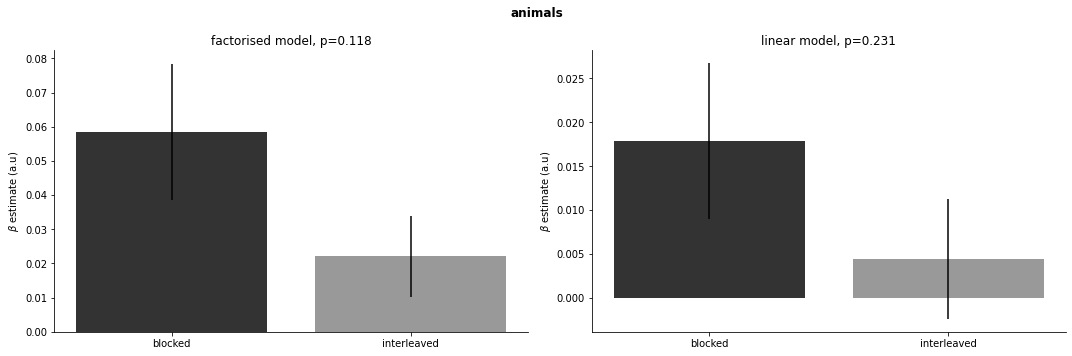

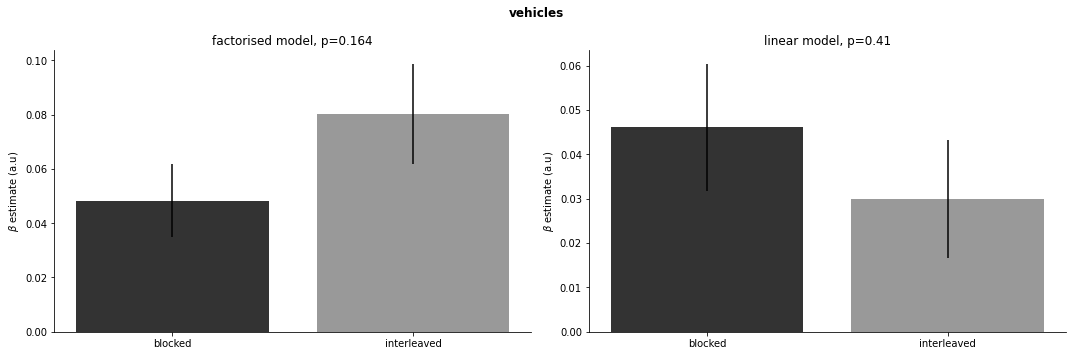

In [53]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
betas = stats_fit_choicerdms(choicemats,onlygood=True)
disp_rsa_param_estimates(betas,onlygood=True)

## Choice Model


In [54]:
choicemats = compute_choicemats(alldata, whichtask="base")
thetas = fit_model_to_subjects(choicemats,onlygood=True)

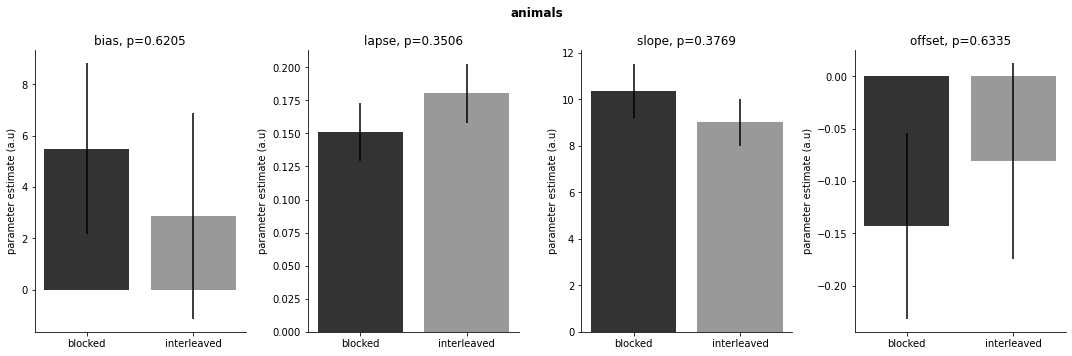

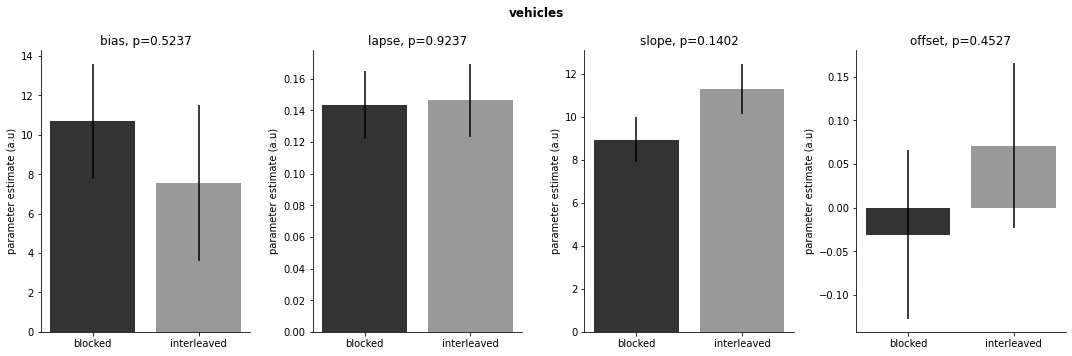

In [55]:
# stats on estimated slopes
disp_model_estimates(thetas)

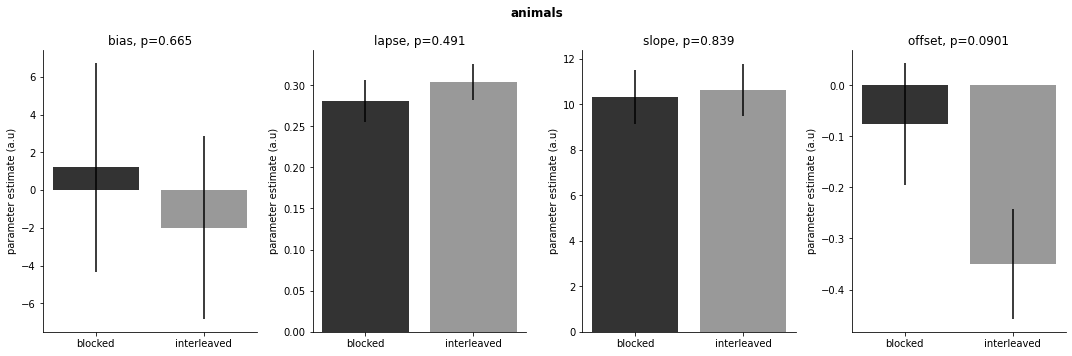

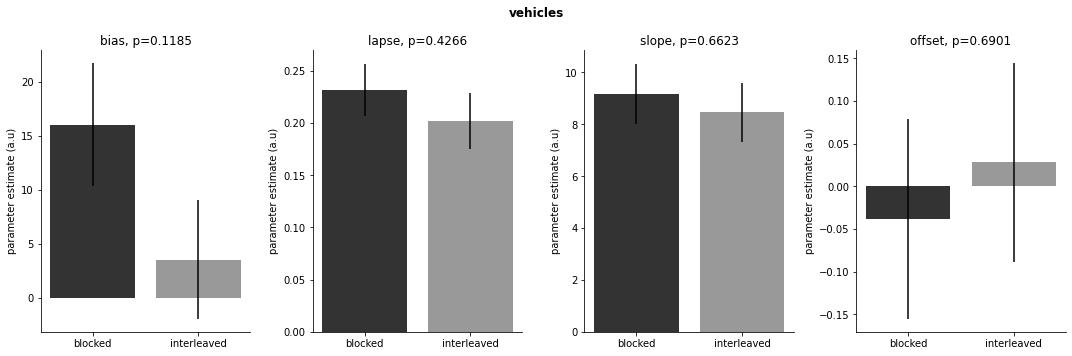

In [56]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
thetas = fit_model_to_subjects(choicemats,onlygood=True)
# stats on estimated slopes
disp_model_estimates(thetas)

## Arena task data

- build RDMs from single subject responses (25x25), separately for each trial
- mds: size/speed as scatter plot

In [ ]:
alldata["animals"]["blocked"]["arena_coords"].shape

In [ ]:
alldata["animals"]["blocked"]["arena_coords"].shape

In [ ]:
import matplotlib.pyplot as plt
# from utils.analysis import arena_compute_rdms
rdms = arena_compute_rdms(alldata)

In [ ]:

plt.figure()
plt.subplot(2,2,1)
plt.imshow(rdms["animals"]["blocked"][:,:2,:,:].mean(1).mean(0))
plt.title("animals - blocked - speed task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,2)
plt.imshow(rdms["animals"]["blocked"][:,2:,:,:].mean(1).mean(0))
plt.title("animals - blocked - size task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,3)
plt.imshow(rdms["animals"]["interleaved"][:,:2,:,:].mean(1).mean(0))
plt.title("animals - interleaved - speed task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,4)
plt.imshow(rdms["animals"]["interleaved"][:,2:,:,:].mean(1).mean(0))
plt.title("animals - interleaved - size task")
cb = plt.colorbar()
cb.set_label("dissimilarity")
plt.tight_layout()


In [ ]:

plt.figure()
plt.subplot(2,2,1)
plt.imshow(rdms["vehicles"]["blocked"][:,:2,:,:].mean(1).mean(0))
plt.title("vehicles - blocked - speed task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,2)
plt.imshow(rdms["vehicles"]["blocked"][:,2:,:,:].mean(1).mean(0))
plt.title("vehicles - blocked - size task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,3)
plt.imshow(rdms["vehicles"]["interleaved"][:,:2,:,:].mean(1).mean(0))
plt.title("vehicles - interleaved - speed task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,4)
plt.imshow(rdms["vehicles"]["interleaved"][:,2:,:,:].mean(1).mean(0))
plt.title("vehicles - interleaved - size task")
cb = plt.colorbar()
cb.set_label("dissimilarity")
plt.tight_layout()


## Todo list
check for evidence of transfer: choice matrix regression with patterns from base as predictors of patterns of transfer task